# *Student Percentage Predictions using Linear Regression*

# Abdul Rafay

The project aims to train a linear regression model that will use supervised machine learning techniques to predict percentage of marks that a student is expected to score based on how long they studied.

## libraries

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data

In [3]:
# Reading and uploading Dataset
data = pd.read_csv('../Datasets/student_scores - student_scores.csv')
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


## Relation Between Features

Let's plot a scatter plot to figure out any relationship between the features of the dataset.

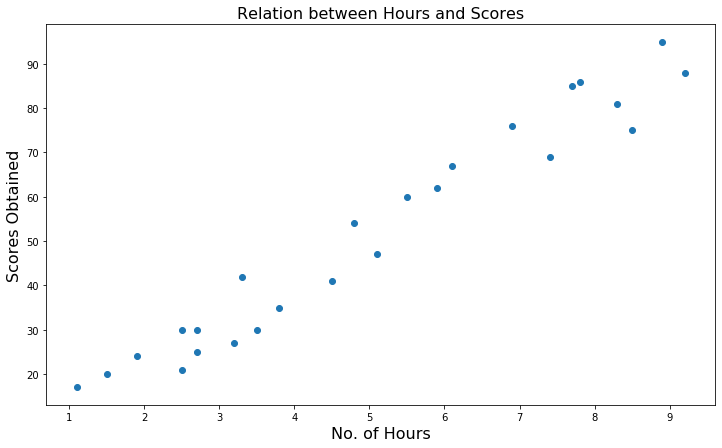

In [4]:
# ploting datasets using matplotlib

plt.figure(figsize=(12,7))
plt.scatter(data['Hours'], y=data['Scores'])
plt.title("Relation between Hours and Scores", fontsize=16)
plt.xlabel("No. of Hours", fontsize=16)
plt.ylabel("Scores Obtained", fontsize=16)
plt.show()

The graph above clearly shows that "Hours" correlates linearly with "Scores". This means that if a student studies for longer hours, he or she will get a higher percentage of marks (score).

## Shaping data for Model

It is best practice to keep a portion of the dataset to evaluate the performance of the model, later on using this data it will be seen how well the trained model is performing on unseen data.
To split data into training and testing I used "sklearn.model_selection.train_test_split" to split data on size 0.1 and 0.9 for testing and training respectively.

In [77]:
# Hold out part of dataset to evaluate the model performance in the end.
# Data is splitted into training & testing subsets on ratio 90, 10 

X = data.iloc[:,:-1].values  # Feature Label
y = data.iloc[:,1].values # Target Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model Initialization & Training

To train a model using linear separable data, I used a linear Regression model.

In [78]:
# Initialize and traine Linear Regession on training set
model = LinearRegression().fit(X_train, y_train)

# How well model performed (Score of the model) on hold-out set/ unseen data
print("Score of the model: ", model.score(X_test, y_test)) 

Score of the model:  0.974047128713709


We have to see if model best fit to the data by maximizing the squared error.

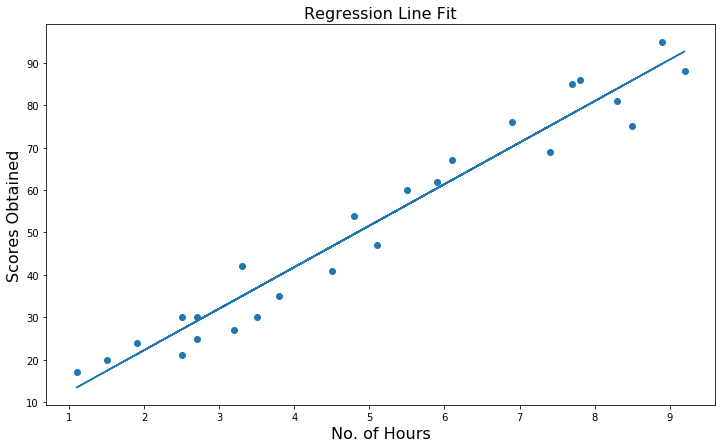

In [79]:
# Plot Regression line Fit 

# Mathematically it is wriiten as: (mx+b)
reg_line = (model.coef_ * X) + model.intercept_

# Plotting using matplotlib: plot and scatter
plt.figure(figsize=(12,7))

plt.scatter(data['Hours'], y=data['Scores'])
plt.plot(data['Hours'], reg_line)

plt.title("Regression Line Fit", fontsize=16)
plt.xlabel("No. of Hours", fontsize=16)
plt.ylabel("Scores Obtained", fontsize=16)
plt.show()

## Prediction using Hold-Out data

Now the trained model will be used to predict "scores" on test sets and random data.

In [80]:
predictions = model.predict(X_test) # Prediction using hold-out dataset

In [82]:
# Compare True Values with Predicted Values
pd.DataFrame({'True': y_test, 'Predicted':predictions})

,True,Predicted
0,81,83.897278
1,30,27.150923
2,21,27.150923


In [86]:
# Predicting Score if a student studies for 9.25 hrs/ day (Randon data)

hours = np.array(9.25)
pred = model.predict(hours.reshape(-1, 1))

print("No of Hours Studied = {}".format(hours))
print("Predicted Score (Precentaage) = {}".format(pred[0]))

No of Hours Studied = 9.25
Predicted Score (Precentaage) = 93.19193983315074


## Evaluation of Model Performance

This is an important step in the design of the machine learning model. This step evaluate the performance of model by 
comparing how well trained model is performing on unseen data.
There are many metrics available for this, including:
* Mean Squared Error
* Mean Absolutue Error
* Root Mean Squared Error

I evaluated performance of the regression model using Mean Square error.

In [87]:
#Evaluation using mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ", mse)

Mean Squared Error:  18.11510415783113
